In [2]:
import sys
sys.path.append('../..')
import ugent

In [124]:
from pyslise import Pyslise
from math import exp, pi

y0 = (0, 1)
p = Pyslise(lambda x: exp(x), 0, pi, tolerance=1e-14)
eigs = p.eigenvaluesByIndex(0, 12, y0, y0)
eigs

[(0, 4.896669379967691),
 (1, 10.045189893253745),
 (2, 16.01926725049222),
 (3, 23.26627094002234),
 (4, 32.26370704580447),
 (5, 43.22001964053414),
 (6, 56.181594022847584),
 (7, 71.15299753705783),
 (8, 88.13211919154618),
 (9, 107.1166761382678),
 (10, 128.10502127333334),
 (11, 151.09604374559694)]

In [150]:
def analyze(E0):
    r = []
    E = E0
    r.append(E)
    for _ in range(20):
        err, derr, theta = p.__error(E, y0, y0)
        E -= err/derr
        r.append(E)
    return E, np.abs((np.array(r) - E)[:-1]/E)

/tmp/ipykernel_159/2649164682.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  E, errs = np.abs(analyze(E0))


4.896669379967691
16.01926725049222
107.1166761382678


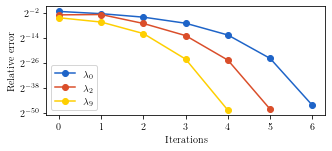

In [188]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))

total = 0
for i, (c, (j, E0)) in enumerate(zip(ugent.palet, [(0, 3), (2, 18), (9, 102)])):
    E, errs = np.abs(analyze(E0))
    print(E)
    assert abs(eigs[j][1] - E) < 1e-8
    t = np.min(np.where(errs == 0))
    if errs[t-1] > 1e-13:
        errs[t] = 1e-16
        t += 1
    total = max(total, t)
    ax.semilogy(errs[:t], color=c, marker='o', base=2, label=f"$\\lambda_{{{j}}}$")

ax.set_xlabel("Iterations")
ax.set_ylabel("Relative error")
ax.set_yticks([2**-i for i in range(2, 53, 12)])
ax.set_xticks(range(total))
ax.legend(loc="lower left")
plt.savefig('shooting_convergence_double.pdf', bbox_inches="tight")

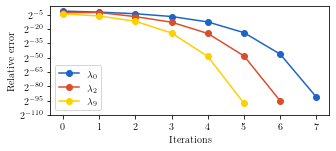

In [187]:
# eps = 1.92593e-34

fig, ax = plt.subplots(1, 1, figsize=(5, 2))

float128_data = [
    (0, 4.89667, "0.387339 0.183773 0.0579033 0.00766433 0.00015506 6.4974e-08 1.14139e-14 3.52225e-28"),
    (2, 16.0193, "0.123647 0.13835 0.00715505 0.000126707 3.71854e-08 3.20639e-15 2.38399e-29"),
    (9, 107.117, "0.0477673 0.0114016 0.00025239 5.19361e-08 2.26338e-15 4.29857e-30")
]

total = 0
for c, (i, E, s) in zip(ugent.palet, float128_data):
    errs = list(map(float, s.split()))
    total = max(total, len(errs))
    ax.semilogy(errs, color=c, marker='o', base=2, label=f"$\\lambda_{{{i}}}$")

ax.set_xlabel("Iterations")
ax.set_ylabel("Relative error")
ax.set_yticks([2**-i for i in range(5, 113, 15)])
ax.set_xticks(range(total))
ax.legend(loc="lower left")
plt.savefig('shooting_convergence_float128.pdf', bbox_inches="tight")

In [179]:
math.log2(1.925e-34)

-112.00069678036279

In [182]:
math.log10(2**-53)

-15.954589770191003

In [176]:
for i, E, s in float128_data:
    errs = list(map(float, s.split()))
    print(' & '.join(f"{e:.0e}" for e in errs))

4e-01 & 2e-01 & 6e-02 & 8e-03 & 2e-04 & 6e-08 & 1e-14 & 4e-28
1e-01 & 1e-01 & 7e-03 & 1e-04 & 4e-08 & 3e-15 & 2e-29
5e-02 & 1e-02 & 3e-04 & 5e-08 & 2e-15 & 4e-30


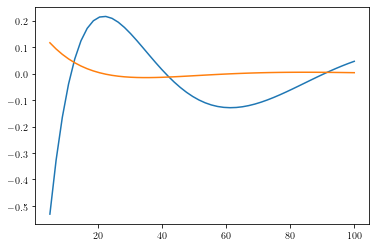

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Es = np.linspace(5, 100, 50)
plt.plot(Es, [p.__error(E, y0, y0)[0] for E in Es])
plt.plot(Es, [p.__error(E, y0, y0)[1] for E in Es])